In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array=cv2.imread(r"C:\Users\91900\Desktop\project\Test_Dataset\Closed_Eyes\s0002_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

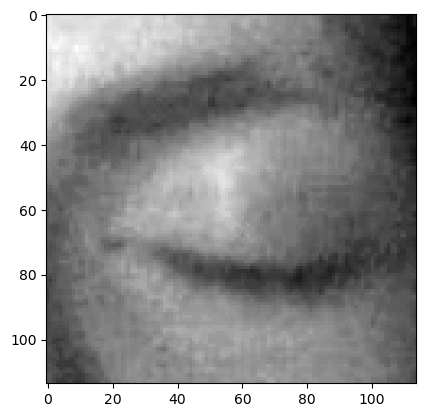

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(114, 114)

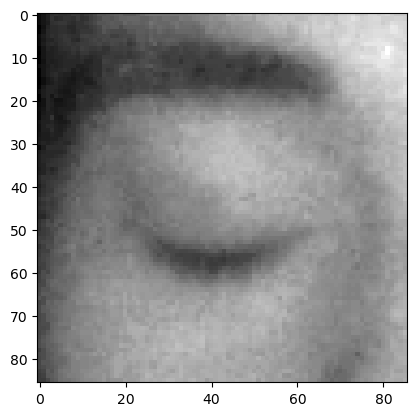

In [6]:
Datadirectory=r"C:\Users\91900\Desktop\project\Train_Dataset"
Classes =["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


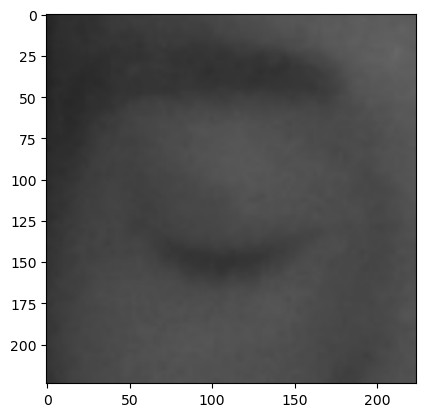

In [7]:
img_size=224

new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [8]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

2061


In [11]:
import random 

random.shuffle(training_Data)

In [12]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(2061, 224, 224, 3)

In [14]:
X=X/255.0;

In [15]:
Y=np.array(y)

In [16]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

# deep learning model for training 

In [18]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [21]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# trasfer learing

In [76]:
base_input = model.layers[1].input

In [77]:
base_output = model.layers[-4].output

In [78]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [79]:
new_model = keras.Model(inputs = base_input,outputs= final_output)


In [80]:
new_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [81]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [136]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)

58/58 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9324 - val_loss: 0.4023


In [43]:
new_model.save('my_model-Drowsiness.keras')

In [82]:
new_model = tf.keras.models.load_model(r'C:\Users\91900\Desktop\project\my_model-Drowsiness.keras')

In [103]:
img_array = cv2.imread(r'C:\Users\91900\Desktop\project\s0012_00003_0_0_0_0_1_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb,(img_size,img_size))

In [104]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [105]:
X_input.shape

(1, 224, 224, 3)

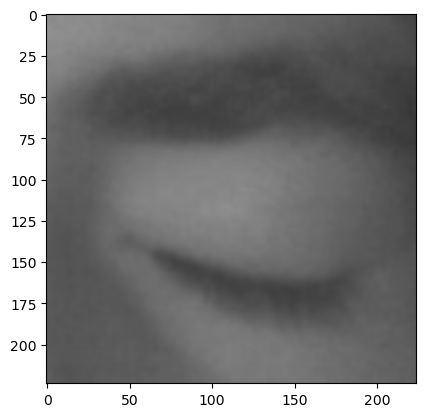

In [106]:
plt.imshow(new_array)

In [107]:
X_input = X_input/255.0

In [108]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [109]:
prediction

array([[0.00115863]], dtype=float32)

In [97]:
img = cv2.imread(r'C:\Users\91900\Downloads\sad_face_women.png')

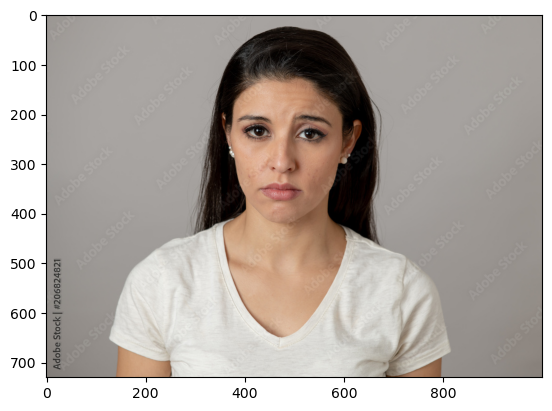

In [99]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [100]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [111]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [112]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [113]:
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

In [114]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+w),(0,255,0),2)

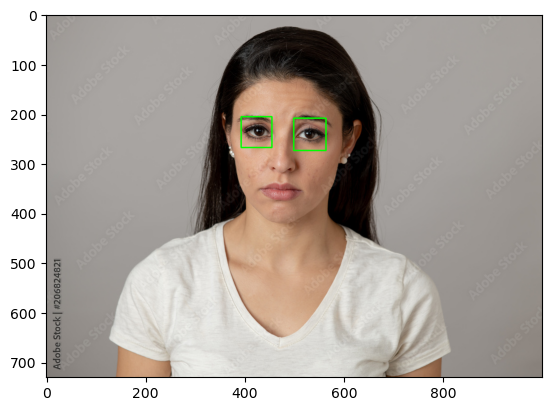

In [115]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [118]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

eyes= eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex: ex+ew]
            

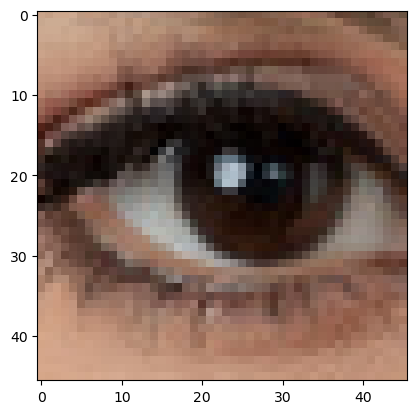

In [119]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [120]:
eyes_roi.shape

(46, 46, 3)

In [121]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [122]:
final_image.shape

(1, 224, 224, 3)

In [123]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.999291]], dtype=float32)

## live video detection 

In [135]:
import cv2

path="haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    eyes= eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+w),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex: ex+ew]
                
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>):
        status="Open Eyes"
    else:
        status="Closed Eyes"
       
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame,
               status,
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if(cv2.waitKey(2) & 0xFF==ord('q')):
        break
        
cap.release()
cv2.distroyAllWindows()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
False


KeyboardInterrupt: 